In [17]:
import numpy as np
import pandas as pd
import random
from collections import Counter

In [48]:
def hillclimber_variable_mutations(df, x=1.9):
    """
    Hillclimb with variable mutation strategy.

    This function uses Gaussian distribution to determine the amount of
    clusters to randomly re-assign. This can be modified by changing the
    optional parameter x. Its default setting of 1.9 allows for a small change.
    It returns a modified version of the input dataframe with some changes
    according to the specified x.
    """
    df = df.fillna(0)
    df['p'] = np.random.normal(0, 1, size=df.shape[0])
    df_to_change = df[df['p'] > x]
    if df_to_change.shape[0] < 2:
#         print("no mutations")
        return df, 0
    df = df[df['p'] < x]

    rest = int(df_to_change['rest'].sum()) * ['rest']
    plastic = int(df_to_change['plastic'].sum()) * ['plastic']
    papier = int(df_to_change['papier'].sum()) * ['papier']
    glas = int(df_to_change['glas'].sum()) * ['glas']
    textiel = int(df_to_change['textiel'].sum()) * ['textiel']
    fracties = rest + plastic + papier + glas + textiel
    random.shuffle(fracties)

    df_to_change = df_to_change.drop(['rest', 'plastic', 'papier',
                                      'glas', 'textiel'], axis=1)
#     print("Amount of clusters to change: " + str(df_to_change.shape[0]))

    fractions_per_cluster = []
    start_pnt = 0
    for i in range(df_to_change.shape[0]):
        length = df_to_change['totaal'].iloc[i]
        fractions_per_cluster.append(fracties[start_pnt:start_pnt + length])
        start_pnt += length
    df_to_change['new_containers'] = fractions_per_cluster

    df_to_change['rest'], df_to_change['plastic'], df_to_change['papier'], \
        df_to_change['glas'], df_to_change['textiel'] = \
        zip(*df_to_change['new_containers'].apply(lambda x: count(x)))

    df = df.append(df_to_change, ignore_index=True)
    df = df.drop(['p', 'new_containers'], axis=1)
    return df, df_to_change.shape[0]


def count(lst):
    """
    Count occurence of fractions in list.

    This function is part of an apply relation. It takese as input a list of
    different fractions. It returns the occurence of all these fractions based
    on a predefined format to be included as columns in a pandas dataframe.
    """
    cnt = Counter()
    for word in lst:
        cnt[word] += 1
    return cnt['rest'], cnt['plastic'], cnt['papier'], cnt['glas'], \
        cnt['textiel']

In [52]:
rest = np.random.randint(0, 6, 5548)
plastic = np.random.randint(0, 3, 5548)
papier = np.random.randint(0, 3, 5548)
glas = np.random.randint(0,3,5548)
textiel = np.random.randint(0,1,5548)
df = pd.DataFrame([rest, plastic, papier, glas, textiel]).T
df = df.rename(columns={0: 'rest', 1: 'plastic', 2: 'papier', 3:'glas', 4:'textiel'})
df['totaal'] = df['rest'] + df['plastic'] + df['papier'] + df['glas'] + df['textiel']

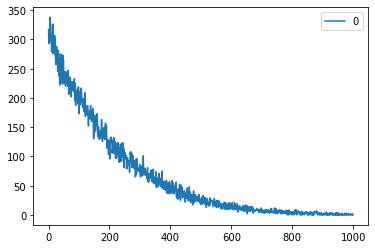

In [60]:
shape_dict = {}
j = 1000
for i in range(j):
    x = 1.60 + i * 2/j
#     print(x)
    df, shape = hillclimber_variable_mutations(df, x = x)
    shape_dict[i] = shape
df2 = pd.DataFrame.from_dict(shape_dict, orient='index').plot() 

-7 0.929258353954366 0.24556136246932875
-7 0.006353324124577231 0.24521644044390373
-1 0.23979711090818734 0.8175807397706988
-4 0.7537136379944462 0.44572898145086104
-4 0.6729649606601171 0.44536859798211104
-7 0.5831203883806116 0.24211849121018394
-1 0.8674252652918601 0.8160926702541295
-1 0.2942887372520102 0.8159266687590917
-3 0.8599525051117343 0.5428602885692894
-6 0.030435619852234863 0.29217757303576913
-1 0.2023970541348169 0.8140919014294166
-3 0.21671232536135032 0.5382024857608744
-4 0.760772197176569 0.4374232209858698
-1 0.11141168304101357 0.8130843353389388
-8 0.29033018738359007 0.19070633427136924
-4 0.8084876705053192 0.4363373417756998
-2 0.7765243298600645 0.6600099338079807
-4 0.6540899681355631 0.4352509061975701
-2 0.2521277220456891 0.6594608697436325
-3 0.7009094928509146 0.5341902574835622
-2 0.020602076923197488 0.657809828409268
-2 0.4440841333653758 0.655599465199394
-4 0.07533851970159311 0.42944751233579387
-3 0.27145643004531317 0.528138240694943
-

-7 0.5477620885308833 0.008054479873158778
-3 0.3058918704483019 0.12612174746529406
-5 0.9811410912395175 0.03139146435170104
-1 0.8324065164776121 0.5001052070571451
-6 0.4400052683484229 0.015257959170571288
-1 0.16074322303027466 0.49767560654669035
-5 0.7908790493763588 0.03042390715780329
-2 0.36486853121959906 0.24664410746351417
-1 0.05375800777835127 0.495937021902326
-1 0.991559365797723 0.4955889921507102
-2 0.06380000557252963 0.24526350804845645
-3 0.2647470688451067 0.11993248217414959
-3 0.9341793483384587 0.11967814166750725
-1 0.8500449432198038 0.4910552399561034
-2 0.486662738565647 0.24044921582953757
-5 0.22554807037412195 0.028249412616884066
-8 0.6147467555627011 0.003267119542451939
-7 0.21032305703916254 0.006516076379749841
-4 0.5394947868302797 0.056182212330533304
-5 0.7556913312792053 0.027156128045084982
-4 0.34056927154236916 0.055698066368625614
-1 0.05583430120668664 0.4854518670878208
-5 0.7132395648920021 0.026863341855840068
-1 0.7529319855947976 0.4

-7 0.30583659861848156 7.918788129030809e-06
-4 0.8252860193877257 0.0012078969142353163
-5 0.5848517084329709 0.00022329871607520922
-1 0.5231296795172902 0.1858002489178269
-1 0.00560845621518169 0.18548748216987646
-1 0.26710121930875697 0.18486259167350505
-4 0.6793585668283629 0.0011600069997753854
-4 0.2326373636303809 0.0011521847746280573
-3 0.8168981421812079 0.006222079195105813
-7 0.5490060400550493 7.036612101424287e-06
-4 0.04881309482240315 0.001106189143484181
-5 0.4942993501557702 0.00020002663437712373
-2 0.9421930271944043 0.032920889170518365
-3 0.42886153803041605 0.005942665923127834
-5 0.3829575479377386 0.000190027506570429
-5 0.5484418732636823 0.00018679400092458048
-4 0.8344682875527214 0.0010330098054146773
-2 0.8580111078652772 0.031919923480184284
-3 0.6004735648132072 0.005614971480334253
-4 0.0027235139425868526 0.0009842814910663686
-3 0.3857815133774718 0.005528178670036532
-1 0.7031219708005744 0.17620578039847962
-4 0.28449520166482156 0.0009573299956

-5 0.970980546716481 3.829117966650081e-10
-2 0.8726019209384536 0.00016524742982140545
-3 0.5348146544882093 2.042441295322497e-06
-5 0.16658263962556086 3.216795070615968e-10
-4 0.09902414299061923 2.4588259079062143e-08
-5 0.1892811183487143 2.8201230488644906e-10
-4 0.4983929909238969 2.1739481143614686e-08
-5 0.07338397110182193 2.4704074368701163e-10
-3 0.5658492245255948 1.6753870639461393e-06
-8 0.13771862106740473 3.687987436851391e-16
-4 0.10221326118124419 1.8865589784858446e-08
-1 0.4472625912084671 0.011667681927014742
-3 0.41444776405443207 1.5258848208071217e-06
-9 0.4200626300089868 3.0240758182204456e-18
-5 0.5180962559891187 1.8082279752177683e-10
-1 0.5433254638543469 0.011207277794907856
-4 0.5889139753582798 1.4158729056564583e-08
-6 0.5264451134200268 1.5957105337095367e-12
-4 0.5779328028580019 1.3168906713045395e-08
-5 0.8865381261400601 1.3177294766840875e-10
-1 0.5790558691457182 0.010519309651984146
-2 0.26381017420452746 0.0001096514788576241
-5 0.6318152454

-7 0.06846059458378173 5.30636889564025e-47
-6 0.33196328469542336 1.9762254967455527e-40
-8 0.1501443659485029 1.018880978151352e-53
-6 0.6492857736175811 1.6455417277595289e-40
-9 0.5251796810836591 1.216643252556168e-60
-6 0.8933078982903396 7.185530374818475e-41
-1 0.10231526374103106 1.9466945983027716e-07
-1 0.48152268912313645 1.8873665792448006e-07
-1 0.8056561742397068 1.8015379579866015e-07
-1 0.5051338799730699 1.7737495951842725e-07
-1 0.4173837774069957 1.7463626877285006e-07
-3 0.7195354007399839 5.082875132468155e-21
-1 0.6428769507489211 1.6665572308216297e-07
-6 0.5021815952164083 1.2191316006769088e-41
-1 0.8824176362695694 1.4245055270299303e-07
-3 0.9906972314209765 2.629376041749796e-21
-4 0.24780953152572738 3.406716059703573e-28
-4 0.7780880832003759 3.1977225432349843e-28
-4 0.8923109588061245 2.184192350329337e-28
-4 0.5850266973156579 1.6918851712169227e-28
-1 0.836418437550662 1.1223876099467362e-07
-2 0.42843285540940923 1.0729467613172674e-14
-2 0.051531636

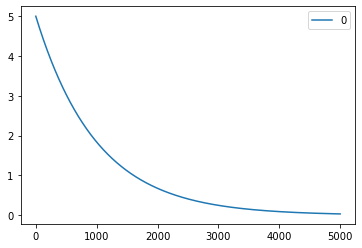

In [159]:
### Simulated annealing
import math

a = np.random.randint(0, 10, 5000) # dummy variables
b = np.random.randint(0, 10, 5000) # dummy variables
t0 = 5
alpha = 0.999

dct = {}
for i in range(len(a)):
#     t = max(t0 ** ((0.75 * len(a)-i)/ (0.75 * len(a))), 1)
    t = t0 * alpha ** i
#     print(t)
    dct[i] = t

    if a[i] < b[i]: # als de nieuwe oplossing slechter is
        x = np.random.rand()
        p = math.exp((a[i]-b[i])/t)
        if prnt:
        print(a[i]-b[i],x, p)
            if p > x:
                print('swap due to SA')
                print(a[i]-b[i],x, p)
            else:
                print('no swap')
    
    else:
        if prnt:
            print('swap directly')
        else:
            pass
        

pd.DataFrame.from_dict(dct, orient='index').plot()